In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [41]:
def read_omp_file(filename):
    re_width = re.compile("### width( *):( *)([^ ]*)")
    re_height = re.compile("### height( *):( *)([^ ]*)")
    re_halo = re.compile("### halo( *):( *)([^ ]*)")
    re_threads = re.compile("### threads( *):( *)([^ ]*)")
    re_comp_t = re.compile("comp_time:( *)([^ ]*)( *)\+-")
    re_total_t = re.compile("totl_time:( *)([^ ]*)( *)ms")
    table = pd.DataFrame(columns=['width', 'height', 'halo', 'threads', 'comp_t', 'total_t'])
    with open(filename, 'r') as infile:
        #skip the first line
        infile.readline()
        line = infile.readline()
        while (line):
            width = int(re_width.search(line).group(3))
            height = int(re_height.search(infile.readline()).group(3))
            halo = int(re_halo.search(infile.readline()).group(3))
            threads = int(re_threads.search(infile.readline()).group(3))
            infile.readline()
            infile.readline()
            comp_t = float(re_comp_t.search(infile.readline()).group(2)) / 1e3
            infile.readline()
            total_t = float(re_total_t.search(infile.readline()).group(2)) / 1e3
            line = infile.readline()
            table = table.append({'width': width, 'height': height, 'halo': halo, 'threads': threads, 'comp_t': comp_t, 'total_t': total_t}, ignore_index=True)
            
    return table

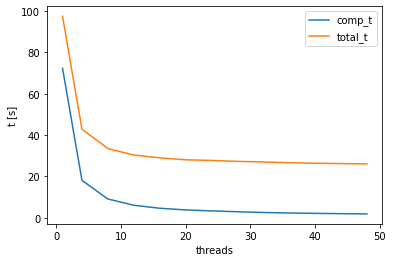

In [42]:
omp_strong_011 = read_omp_file("omp_strong_011.txt")
omp_strong_011_mean = omp_strong_011.iloc[:,-3:].groupby('threads').mean()
omp_strong_011_mean.plot(y=[0,1], ylabel= "t [s]")
plt.show()

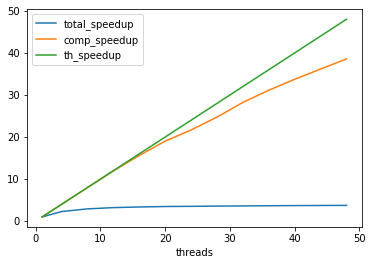

In [43]:
omp_strong_011_mean['total_speedup'] = omp_strong_011_mean.iloc[0,1] / omp_strong_011_mean['total_t']
omp_strong_011_mean['comp_speedup'] = omp_strong_011_mean.iloc[0,0] / omp_strong_011_mean['comp_t']
omp_strong_011_mean['th_speedup'] = omp_strong_011_mean.index
omp_strong_011_mean.iloc[:,-3:].plot()
plt.show()

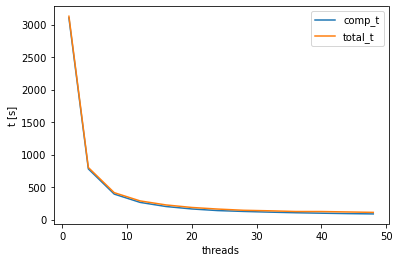

In [44]:
omp_strong_101 = read_omp_file("omp_strong_101.txt")
omp_strong_101_mean = omp_strong_101.iloc[:,-3:].groupby('threads').mean()
omp_strong_101_mean.plot(y=[0,1], ylabel= "t [s]")
#plt.ticklabel_format(axis="y", style="plain")
plt.show()

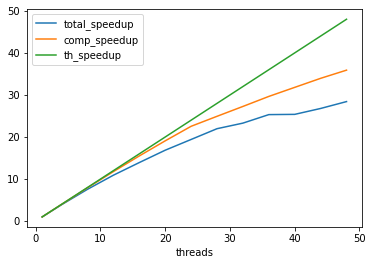

In [45]:
omp_strong_101_mean['total_speedup'] = omp_strong_101_mean.iloc[0,1] / omp_strong_101_mean['total_t']
omp_strong_101_mean['comp_speedup'] = omp_strong_101_mean.iloc[0,0] / omp_strong_101_mean['comp_t']
omp_strong_101_mean['th_speedup'] = omp_strong_101_mean.index
omp_strong_101_mean.iloc[:,-3:].plot()
plt.show()

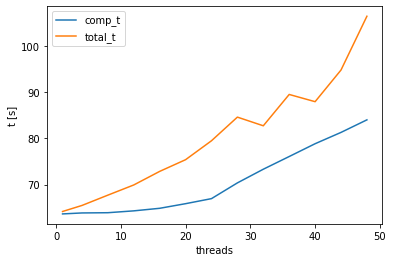

In [46]:
omp_weak_101 = read_omp_file("omp_weak_101.txt")
omp_weak_101_mean = omp_weak_101.iloc[:,-3:].groupby('threads').mean()
omp_weak_101_mean.plot(y=[0,1], ylabel= "t [s]")
plt.show()

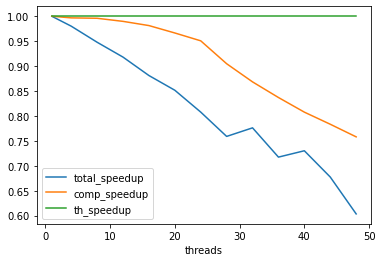

In [47]:
omp_weak_101_mean['total_speedup'] = omp_weak_101_mean.iloc[0,1] / omp_weak_101_mean['total_t']
omp_weak_101_mean['comp_speedup'] = omp_weak_101_mean.iloc[0,0] / omp_weak_101_mean['comp_t']
omp_weak_101_mean['th_speedup'] = 1.0
omp_weak_101_mean.iloc[:,-3:].plot()
plt.show()